In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv(r'C:\Users\Acer\Downloads\insurance.csv')
df = pd.DataFrame(data)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


* Age of subjects range from 18 to 64.


* BMI ranges from 16 to 53, 16 being underweight and 53 being well into obesity.


* Some subjects have no children, some have as many as five children.


* Overall charges for individual medical costs billed by health insurance range from 1,100 for some, to almost 64,000 for others.

## Exploratory Data Analysis

- How many females, versus males?


- How many smokers, versus non-smokers?


- Are there a material amount of outliers in any of the variables?


- Anything else?


#### A. How many females, versus males?

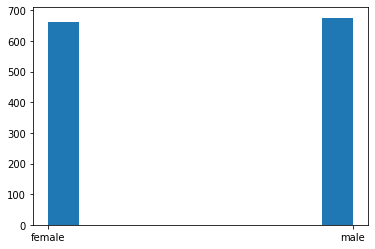

In [10]:
import matplotlib.pyplot as plt

plt.hist(df['sex'])

plt.show()

In [12]:
def count(dataframe, col_name, value):
    count = 0
    for i in range(dataframe.shape[0]):
        if df.iloc[i][col_name] == value:
            count += 1
        else:
            continue
    print(value, " count in ", col_name, " column = ", count)

count(df, 'sex', 'female')
count(df, 'sex', 'male')

female  count in  sex  column =  662
male  count in  sex  column =  676


* The dataset is definitely balanced in relation to gender; 662 females, 676 males. 


#### B. How many smokers, versus non-smokers?

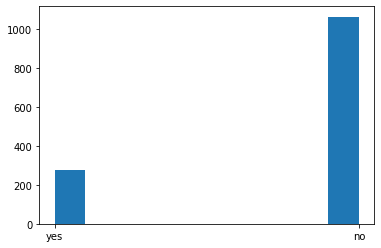

In [13]:
plt.hist(df['smoker'])

plt.show()

* Overwhelmingly, the dataset is non-smokers.

#### C. What regions are most of the subjects in?

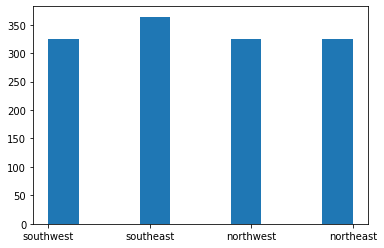

In [18]:
plt.hist(df['region'])

plt.show()

* Again, pretty evenly distributed in relation to region.

#### D. Are there any outliers in any columns?

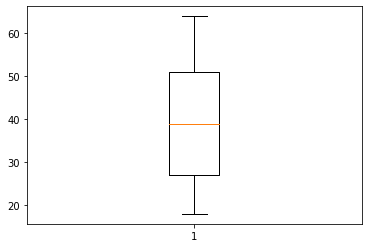

In [14]:
# Creating plot
plt.boxplot(df['age'])

plt.show()

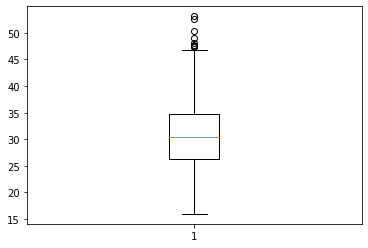

In [15]:
# Creating plot
plt.boxplot(df['bmi'])

plt.show()

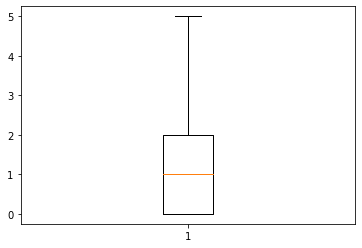

In [16]:
# Creating plot
plt.boxplot(df['children'])

plt.show()

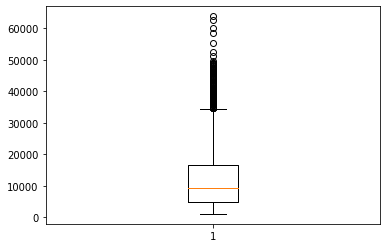

In [17]:
# Creating plot
plt.boxplot(df['charges'])

plt.show()

* It appears a material amount of outliers exist for both the charges and bmi.


* It appears there are many outliers; let's see how many outliers there are.

In [51]:
IQR = df['charges'].quantile(0.75) - df['charges'].quantile(0.25) #Find interquartile range


lower_lim = df['charges'].quantile(0.25) - (1.5*IQR) #Find lower limit of range
upper_lim = df['charges'].quantile(0.75) + (1.5*IQR) #Find upper limit of range

df['charges'][(df['charges'] < lower_lim) | (df['charges'] > upper_lim)] #find outliers of charges column

14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1300    62592.87309
1301    46718.16325
1303    37829.72420
1313    36397.57600
1323    43896.37630
Name: charges, Length: 139, dtype: float64

* There are about 140 outliers... we will keep them for the moment, as it would seem there is reason for these high insurance charges.

In [53]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


* Still need to make certain columns numeric, but age seems to be the highest correlating factor to what insurance is paid...but let's keep analyzing.

#### E. Encoding variables

* We need to encode the variables which are currently non-numeric; sex, smoker, region.


* None of the variables are ordinal; all are nominal.


* Best method of action = one-hot encoding.

In [54]:
df = pd.get_dummies(data=df, columns=['sex', 'smoker', 'region'])

df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


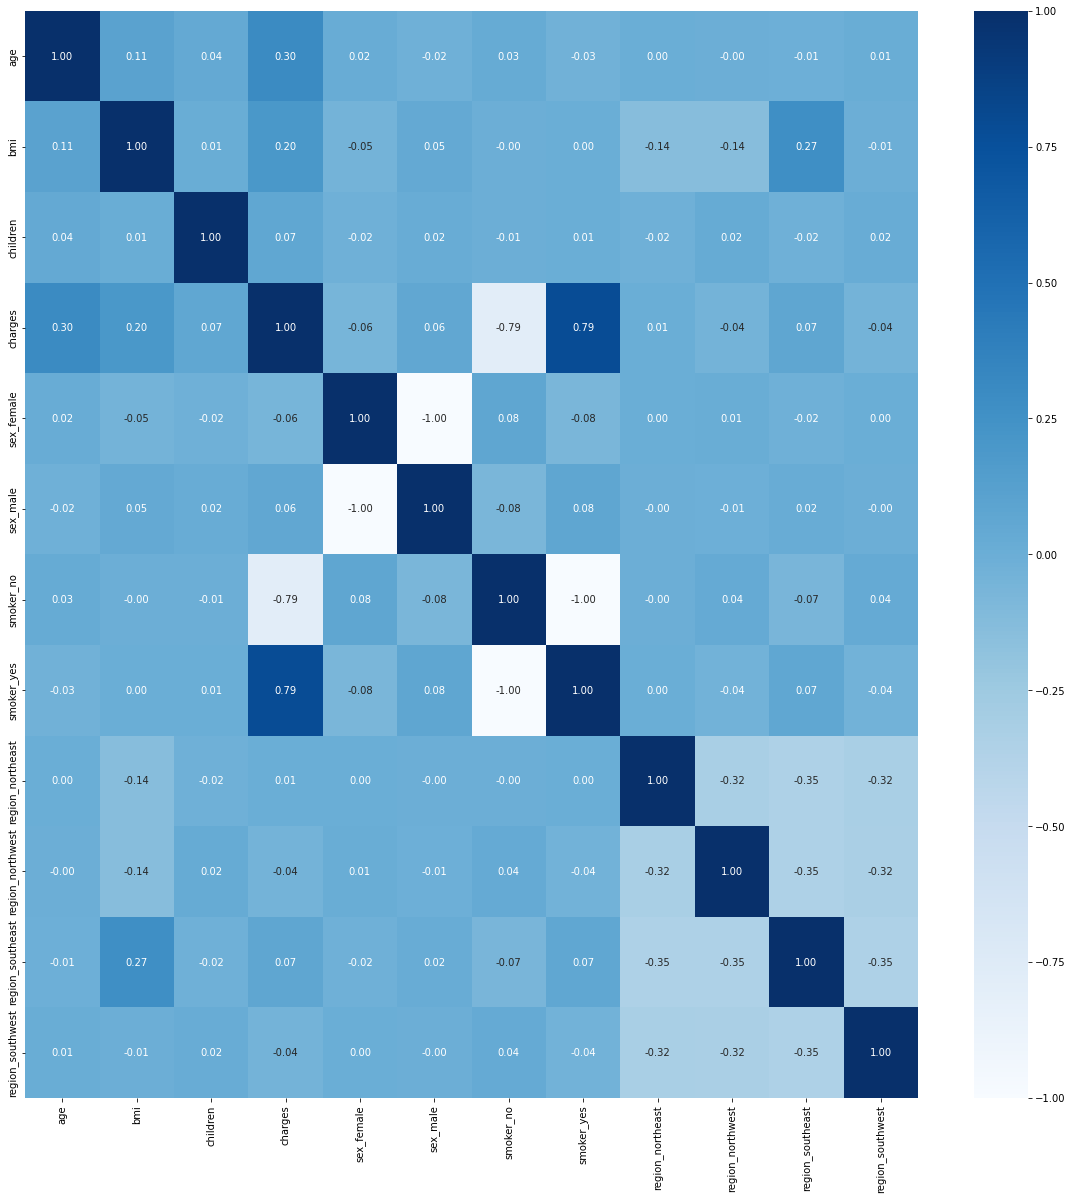

In [60]:
import seaborn as sns

plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), 
            annot = True, 
            cmap = "Blues",
            fmt = ".2f",
            vmin = -1.00, vmax = 1.00)
plt.show()

#### Preliminary notes after one-hot encoding the categorical variables---


* Being a smoker has a high correlation to high charges; this is expected given the data is imbalanced towards smokers, anyways.
    
    
* Age has a material correlation with charges, as is common sense; bmi also seems to have somewhat of a factor. 
    
    
* No other variable had a strong correlation with charges.
    
    
* The highest correlations, outside of being a smoker to your charges, is related to different regions. Do not think this is at a level of creating multicollinearity, but let us look...

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = df[['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

            feature       VIF
0  region_northeast  0.209877
1  region_northwest  0.212308
2  region_southeast  0.296703
3  region_southwest  0.212308


* The VIFs for the regions are very small; we can assume we do not have to worry about multicollinearity.


* Let's view the similarity in columns on a line graph.

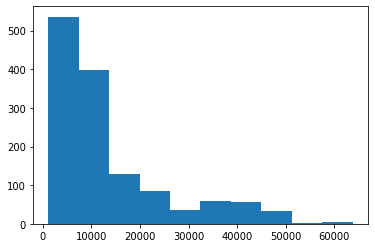

In [66]:
'''line_1 = df['smoker_yes']
line_2 = df['charges']

fig, ax = plt.subplots()

ax.plot(line_2, color = 'green', label = "Charges")

ax2 = ax.twinx()

ax2.plot(line_1, color = 'red', label = 'Smoker?')
ax2.set_ylim(0, 1)
ax.legend(loc = 'upper left')
plt.show()'''

plt.hist(df['charges'])
plt.show()

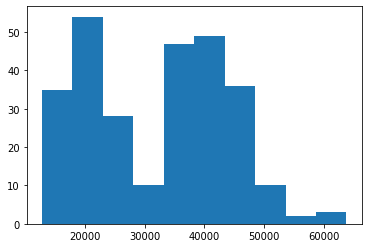

136
0.49635036496350365


In [89]:
#lst = [df['charges'] for i in range(df.shape[0]) if df.iloc[i]['smoker_yes'] == 1]

lst = []
for i in range(df.shape[0]):
    if df.iloc[i]['smoker_yes'] == 1:
        lst.append(df.iloc[i]['charges'])
#print(lst)

plt.hist(lst)
plt.show()

#lst = list(lst)
count = 0
for i in lst:
    if i > upper_lim:
        #print(i)
        count += 1
print(count)
print(count/len(lst))

* Interestingly, only 10% of the total dataset are outliers, meaning that charges for only 10% of the entire dataset have a charge history greater than approximately 34,500 dollars.


* When you analyze smokers as a subset of the dataset, however, approximately 50% of smokers analyzed were charged above that 34,500! Additionally, it appears that nearly all of the outliers (136 out of 139) were related to smokers! This data explains the significant correlation between smokers and insurance charges. You can see in the histogram directly above the difference in insurance charge distribution between the entire dataset, and a dataset of the smoker subset.


* Interestingly, there is little correlation between smoking and age or smoking and bmi...meaning that is likely not why age or bmi lead to higher insurance charges.


* My question: do the smokers account for all 60,000+ insurance charges?

In [96]:
smoker_subset_count = []
whole_dataset_count = []
for i in range(df.shape[0]):
    if df.iloc[i]['smoker_yes'] == 1 and df.iloc[i]['charges'] > 60000:
        smoker_subset_count.append(df.iloc[i]['charges'])
        whole_dataset_count.append(df.iloc[i]['charges'])
    elif df.iloc[i]['charges'] > 60000:
        whole_dataset_count.append(df.iloc[i]['charges'])
    else:
        continue

print(smoker_subset_count)
print(whole_dataset_count)

[63770.42801, 60021.39897, 62592.87309]
[63770.42801, 60021.39897, 62592.87309]


* Above confirms the smokers account for all of the charges above 60,000, even with the data including so little smokers on an absolute basis. 

## Conclusion

* We can assume that smoking, while causation does not mean correlation, is a strong reason for a lot of the higher insurance charges in the dataset.


* Age and bmi shows material correlation with insurance charges.


* Gender, amount of children, and region seem to have very little effect on insurance charges.